# 통계계산 3주차 

### 지난시간 복습

원주율을 계산하는 아이디어를 hit or miss 방법으로 확장함 

hit or miss는 함수가 bound되어있어야 한다는 단점이 존재하였음. (사각형을 만들어야하니까..)
- 예를들어서 $\frac{1}{\sqrt{x}}$와 같은 함수는 몬타카를로방법으로 적분값을 근사하기 어려움.  

이를 보완하기 위해서 표본평균 몬테카를로 방법이 등장하였는데, 아이디어는 $X$의 구간에서만 랜덤으로 확률변수를 뽑고 이를 이용해서.. 

#### 복습예제: $\int_0^1\frac{1}{\sqrt{x}}dx=?$

(해석적풀이)

$\int_0^1\frac{1}{\sqrt{x}}dx=\int_0^1 x^{-1/2}dx=\big[2x^{1/2}\big]_0^1=\big[2\sqrt{x}\big]_0^1=2$

(몬테카를로)

In [1]:
n<-1e5
x<-runif(n)
gx<-1/sqrt(x)

In [2]:
mean(gx)

[1] 1.991236

### 적분구간이 무한대라면? 

예를들어 $g(x)=\frac{1}{(x+1)^2}$와 같은 함수를 $0$부터 $\infty$ 까지 적분하고 싶다고하자. 

즉 아래는 어떻게 계산하는가? 

### 예제1: $\int_0^{\infty}\frac{1}{(x+1)^2}dx=?$

(해석적풀이)

$\int_0^{\infty}\frac{1}{(x+1)^2}dx=\int_1^{\infty}\frac{1}{u^2}du$

$=\left[-u^{-1} \right]_1^{\infty}=1$

(몬테카를로)

아래와 같은 함수를 고려하자. 

$f(x)=\frac{1}{10}e^{-x/10},\quad x\geq 0$

그런데, 우리가 관심있는 것은 $\int_0^{\infty} g(x)dx$이다. 

$f(x)$는 지수분포이므로 $\int_0^{\infty}f(x)dx=1$인데, 공교롭게도 적분구간이 겹친다. 

관심수식을 다시 표현하면 

$\int_0^{\infty}g(x)dx=\int_0^{\infty}\frac{g(x)}{f(x)}f(x)dx$

$=E\left[\frac{g(X)}{f(X)} \right]$

와 같이 표현할 수 있다. 

In [50]:
n=10000
X<-rexp(n,0.1)
fX<-0.1*exp(-X/10)
gX<-1/((1+X)^2)
mean(gX/fX)

[1] 1.028009

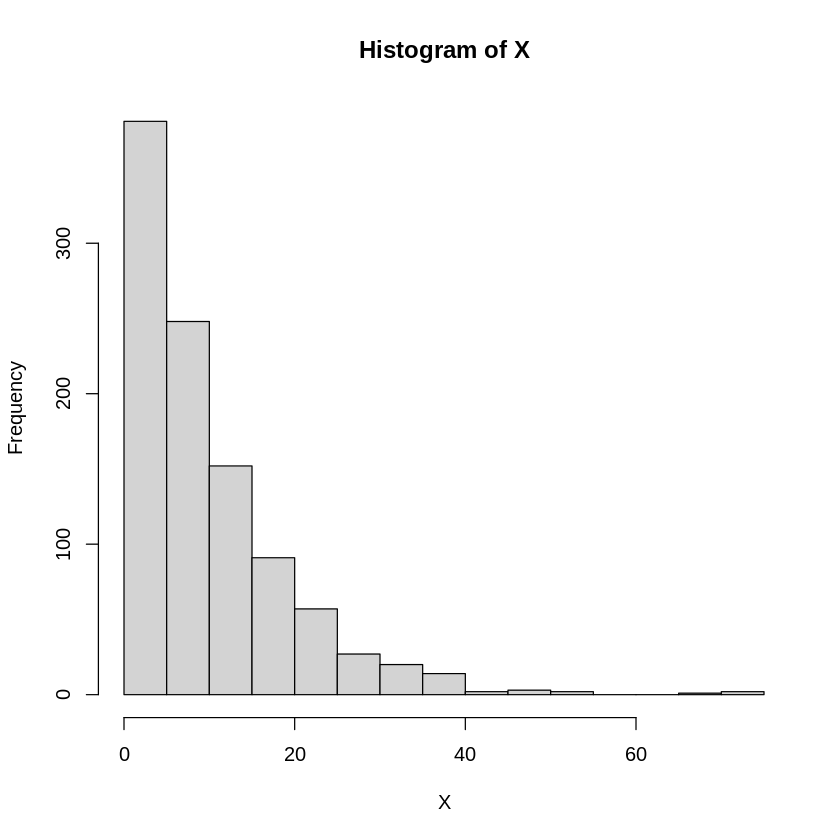

In [42]:
hist(X)

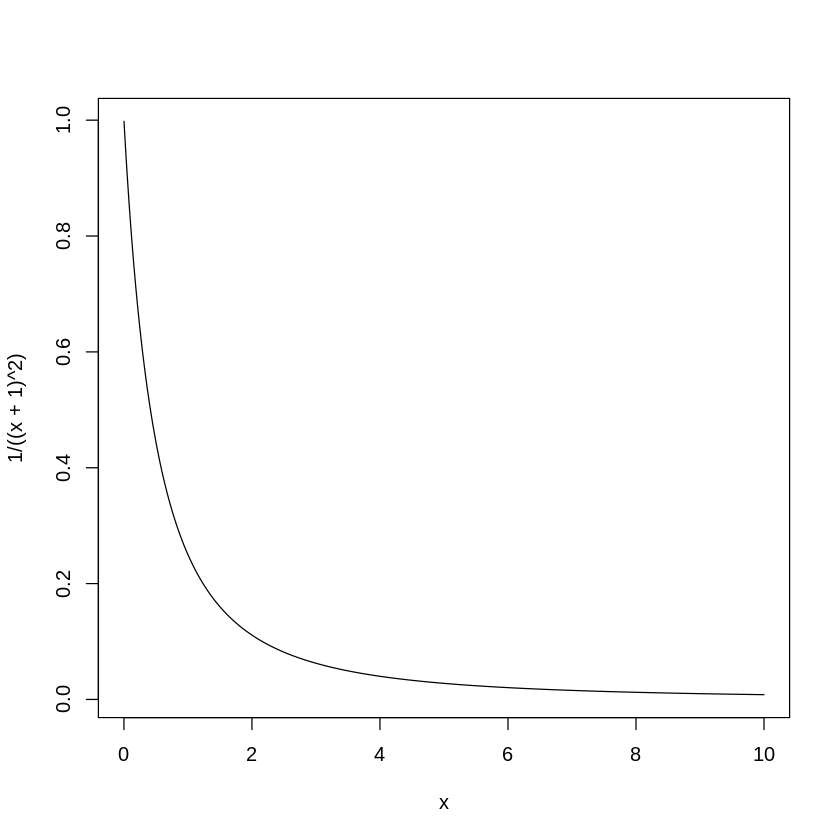

In [37]:
x<-1:10000/1000
plot(x,1/((x+1)^2),type='l')

### 예제2: $\int_0^\infty x^2e^{-x}dx=?$

(해석적풀이)

$\int_0^{\infty}x^2e^{-x}dx=\Gamma(3)=2!=2$

(몬테카를로)

In [56]:
n=1000
X<-rexp(n,0.1)
fX<-0.1*exp(-X/10)
gX<-X^2*exp(-X)
mean(gX/fX)

[1] 2.110663

다른분포로 추정하면 안되나? 

예를들면 감마? 

#### (참고) 감마분포의 pdf: $f(x)=\frac{\beta^\alpha}{\Gamma(\alpha)}x^{\alpha-1}e^{-\beta x}$  

In [70]:
alpha<-3
beta<-1

n=1000
X<-rgamma(n,shape=alpha,scale=beta)
fX<-beta^alpha / 2 * X^(alpha-1)*exp(-X)
gX<-X^2*exp(-X)
mean(gX/fX)

[1] 2

In [71]:
gX/fX

[1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [371] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [408] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [445] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [482] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [519] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [556] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [593] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [630] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [667] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [704] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [741] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [778] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [815] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [852] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [889] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [926] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [963] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[1000] 2

### *[알고리즘]* $\int_0^{\infty}g(x)dx$를 계산하고 싶을때, 

(1) 적당한 확률밀도 함수 $f(x)$에서 $n$개의 난수를 생성한다. $f(x)$는 연속형이고 무한대의 적분구간을 가져야함. 

(2) $g(X_i)/f(X_i)$를 계산한다. (단, $g(x)$는 피적분함수)

(3) 적분값을 $\frac{1}{n}\sum_{i=1}^n\frac{g(X_i)}{f(X_i)}$로 추정한다. 

(팁) 적분을 빠르게 근사시키려면 적당한 분포 $f(x)$를 잘 선택해야함. 

### 예제3: $\int_{-\infty}^{t}\frac{1}{2\sqrt{\pi}}e^{-x^2/2}dx=?$

In [80]:
t<-1.96
n<-10000
X<-rnorm(n)
sum(X<t)/n

[1] 0.9761

그런데, 가만히 생각해보니까 랜덤샘플은 어떻게 추출하지? 

---

# \# 몬테카를로 적분 (잠시 접어두자) 

- 지금까지 한것 
- 처음에는 유니폼에서만 뽑으면 적분을 다 할수 있을것 같았음. 그런데 점점 다양한 분포에서 확률변수를 추출해야 하는 필요성이 생김. 

# \# 샘플링 

학습목표: 랜덤표본을 추출하는 방법자체를 알아보자. 

가정: $U(0,1)$은 생성할 수 있다고 가정하자. 

# 1. inverse sampling 

- 역변환기법
- inverse cdf 

### 목표: 지수분포를 생성하여 보자. 

아래와 같은 2개의 지수분포를 고려하여 보자. 

$f(x)=e^{-x}, \quad g(x)=\frac{1}{10}e^{-\frac{1}{10}x}$

pdf를 그려보면 아래와 같다. 

In [84]:
fx<-function(x){
    exp(-x)
}
gx<-function(x){
    exp(-x/10)/10
}

In [123]:
x=c(0,1:1000/20)

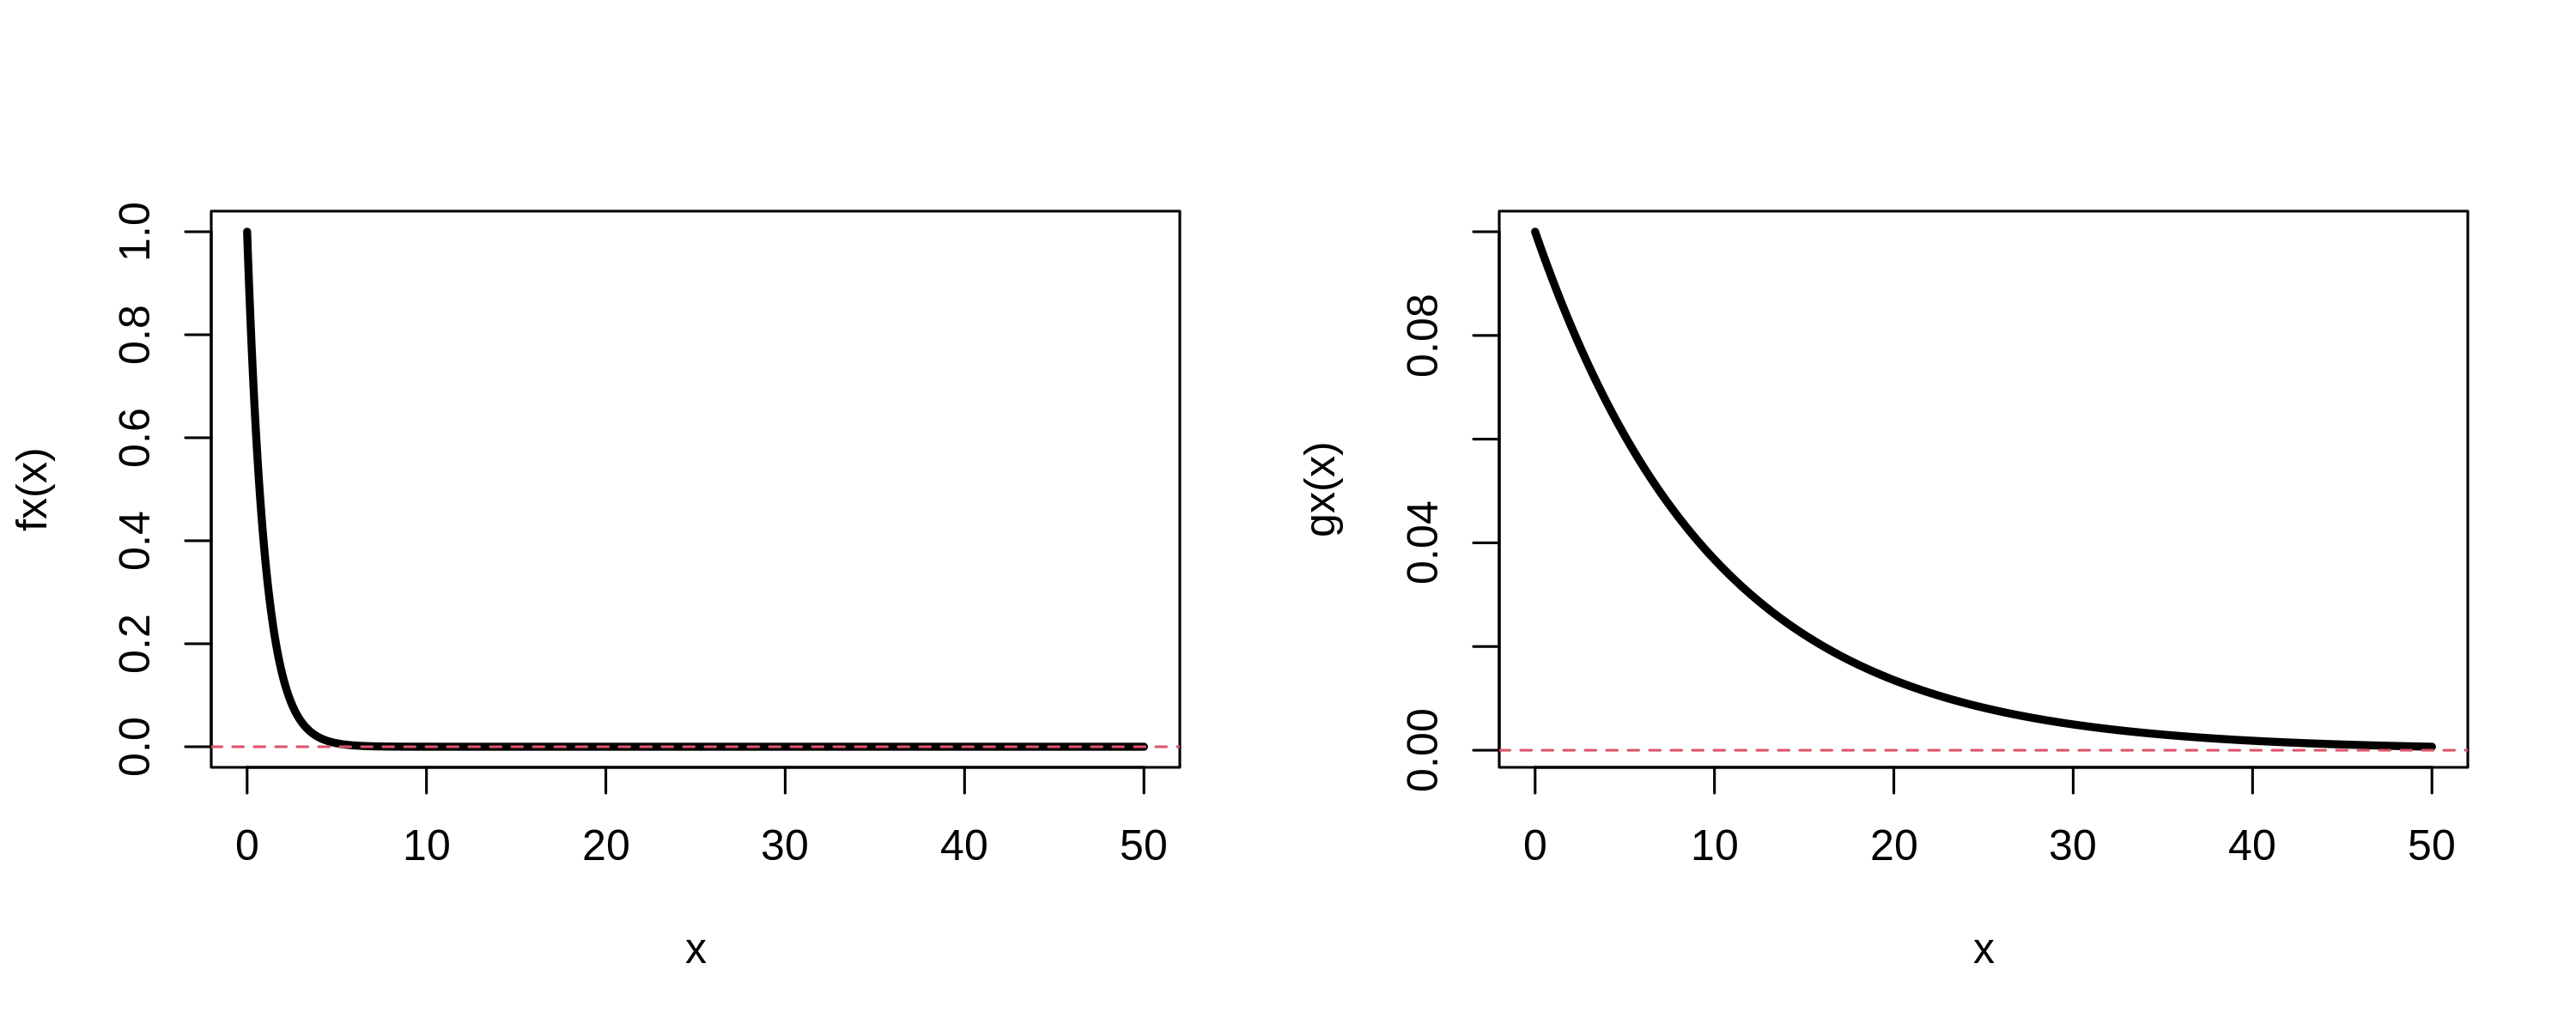

In [124]:
options(repr.plot.width=1*10, repr.plot.height=0.8*5,repr.plot.res=1*300)
par(mfrow=c(1,2))
plot(x,fx(x),type='l',lwd=3)
abline(h=0,col=2,lty=2)
plot(x,gx(x),type='l',lwd=3)
abline(h=0,col=2,lty=2)
par(mfrow=c(1,1))

왼쪽: 평균이 1인 지수분포... 

오른쪽: 평균이 10인 지수분포... 

당연히 평균적으로 왼쪽의 분포에 뽑힌 확률변수가 상대적으로 작은값임을 쉽게 예상할 수 있다. 

각 분포의 cdf는 아래와 같다. (손계산)

$\mbox{left}=F(x)=\int_0^xf(\tau)d\tau$

$=\int_0^x e^{-\tau}d\tau$

$=\big[-e^{-\tau} \big]_0^x$

$=-e^{-x}+1$

$\mbox{right}=G(x)=\int_0^xg(\tau)d\tau$

$=\int_0^x \frac{1}{10} e^{-\tau/10}d\tau$

$=\big[-e^{-\tau/10} \big]_0^x$

$=-e^{-x/10}+1$

In [125]:
Fx<-function(x){
    -exp(-x)+1
}
Gx<-function(x){
    -exp(-x/10)+1
}

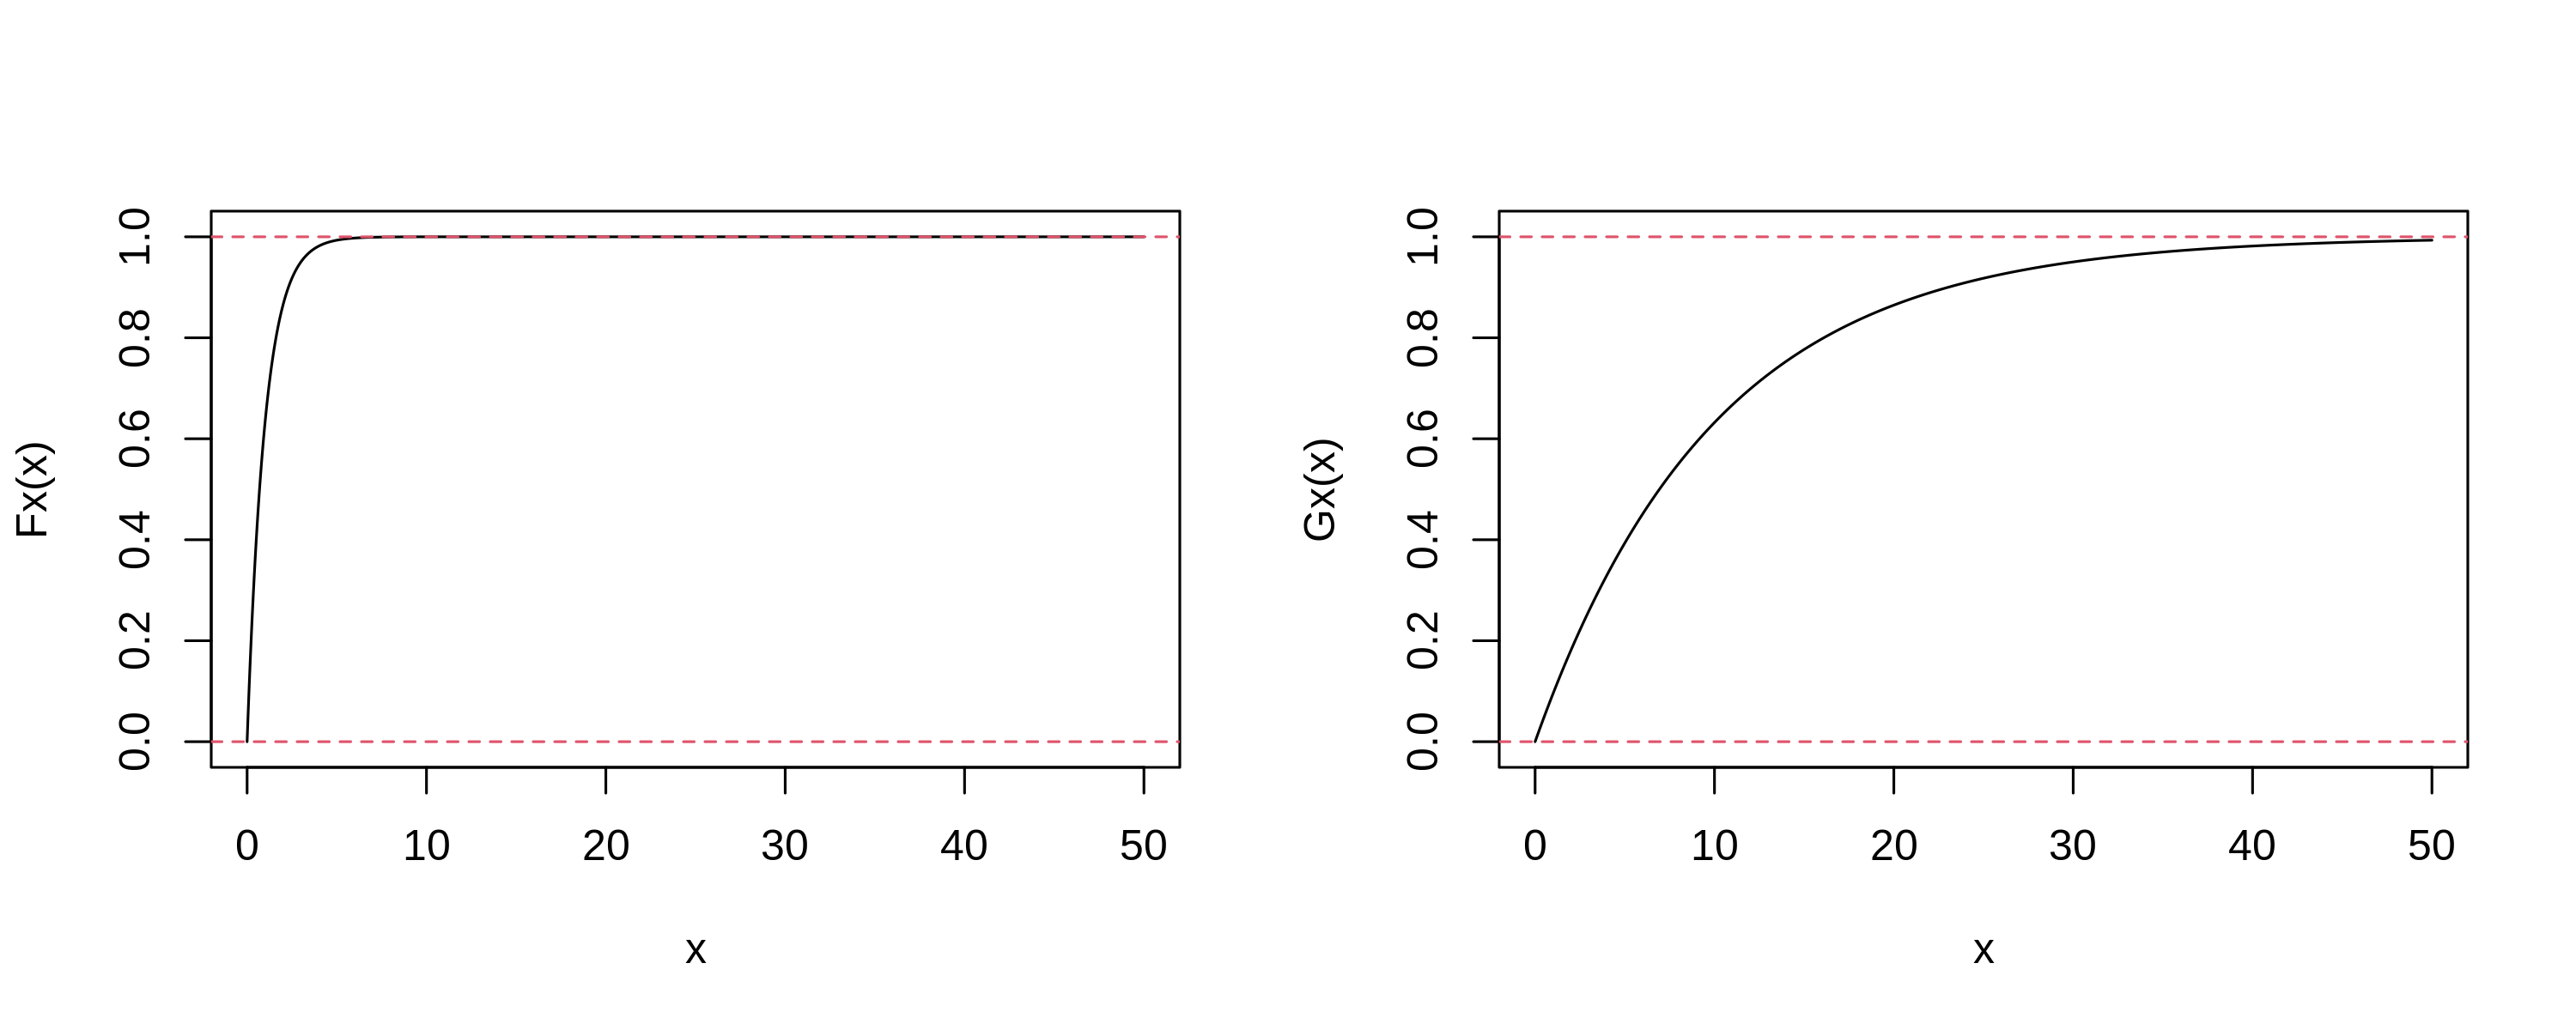

In [126]:
options(repr.plot.width=1*10, repr.plot.height=0.8*5,repr.plot.res=1*300)
par(mfrow=c(1,2))
plot(x,Fx(x),type='l',ylim=c(-0.01,1.01))
abline(h=0,lty=2,col=2)
abline(h=1,lty=2,col=2)
plot(x,Gx(x),type='l',ylim=c(-0.01,1.01))
abline(h=0,lty=2,col=2)
abline(h=1,lty=2,col=2)
par(mfrow=c(1,1))

왼쪽: 어차피 평균이 1인 지수분포의 cdf이므로, 생성된 값들은 대부분 10 이하일 테니까, $x=10$근처에서는 거의 1에 가까워진다. 

오른쪽: 평균이 10인 지수분포의 cdf이므로, 생성된 값들은 절반정도 10이하일 것이므로, $x=10$근처에서는 거의 $0.5$근처의 값을 가진다. 

$y$축에서 랜덤변수를 발생시킨뒤에, $\rightarrow$ $\downarrow$ 를 하여 $x$축에 내린다고 생각해보자.

왼쪽: 대부분 10이하에서 떨어짐 

오른쪽: 대략 절반정도가 10이하에 떨어지고 나머지는 10이상에 떨어질것임

!!! 

일단 구현해보자. 

In [129]:
# x --> - --> exp --> - ---> +1  
# u-1 ==> -(u-1) ==> log(1-u) ==> -log(1-u)  

$F^{-1}(x)=-\log(1-x)$

$G(x)=-e^{-x/10}+1$

In [130]:
# x --> *(-1/10) --> exp --> - ---> +1  
# u-1 ==> -(u-1) ==> log(1-u) ==> -10*log(1-u) 

$G^{-1}(x)=-10\log(1-u)$

In [131]:
Finv<-function(u){
    -log(1-u)
}

Ginv<-function(u){
    -10*log(1-u)
}

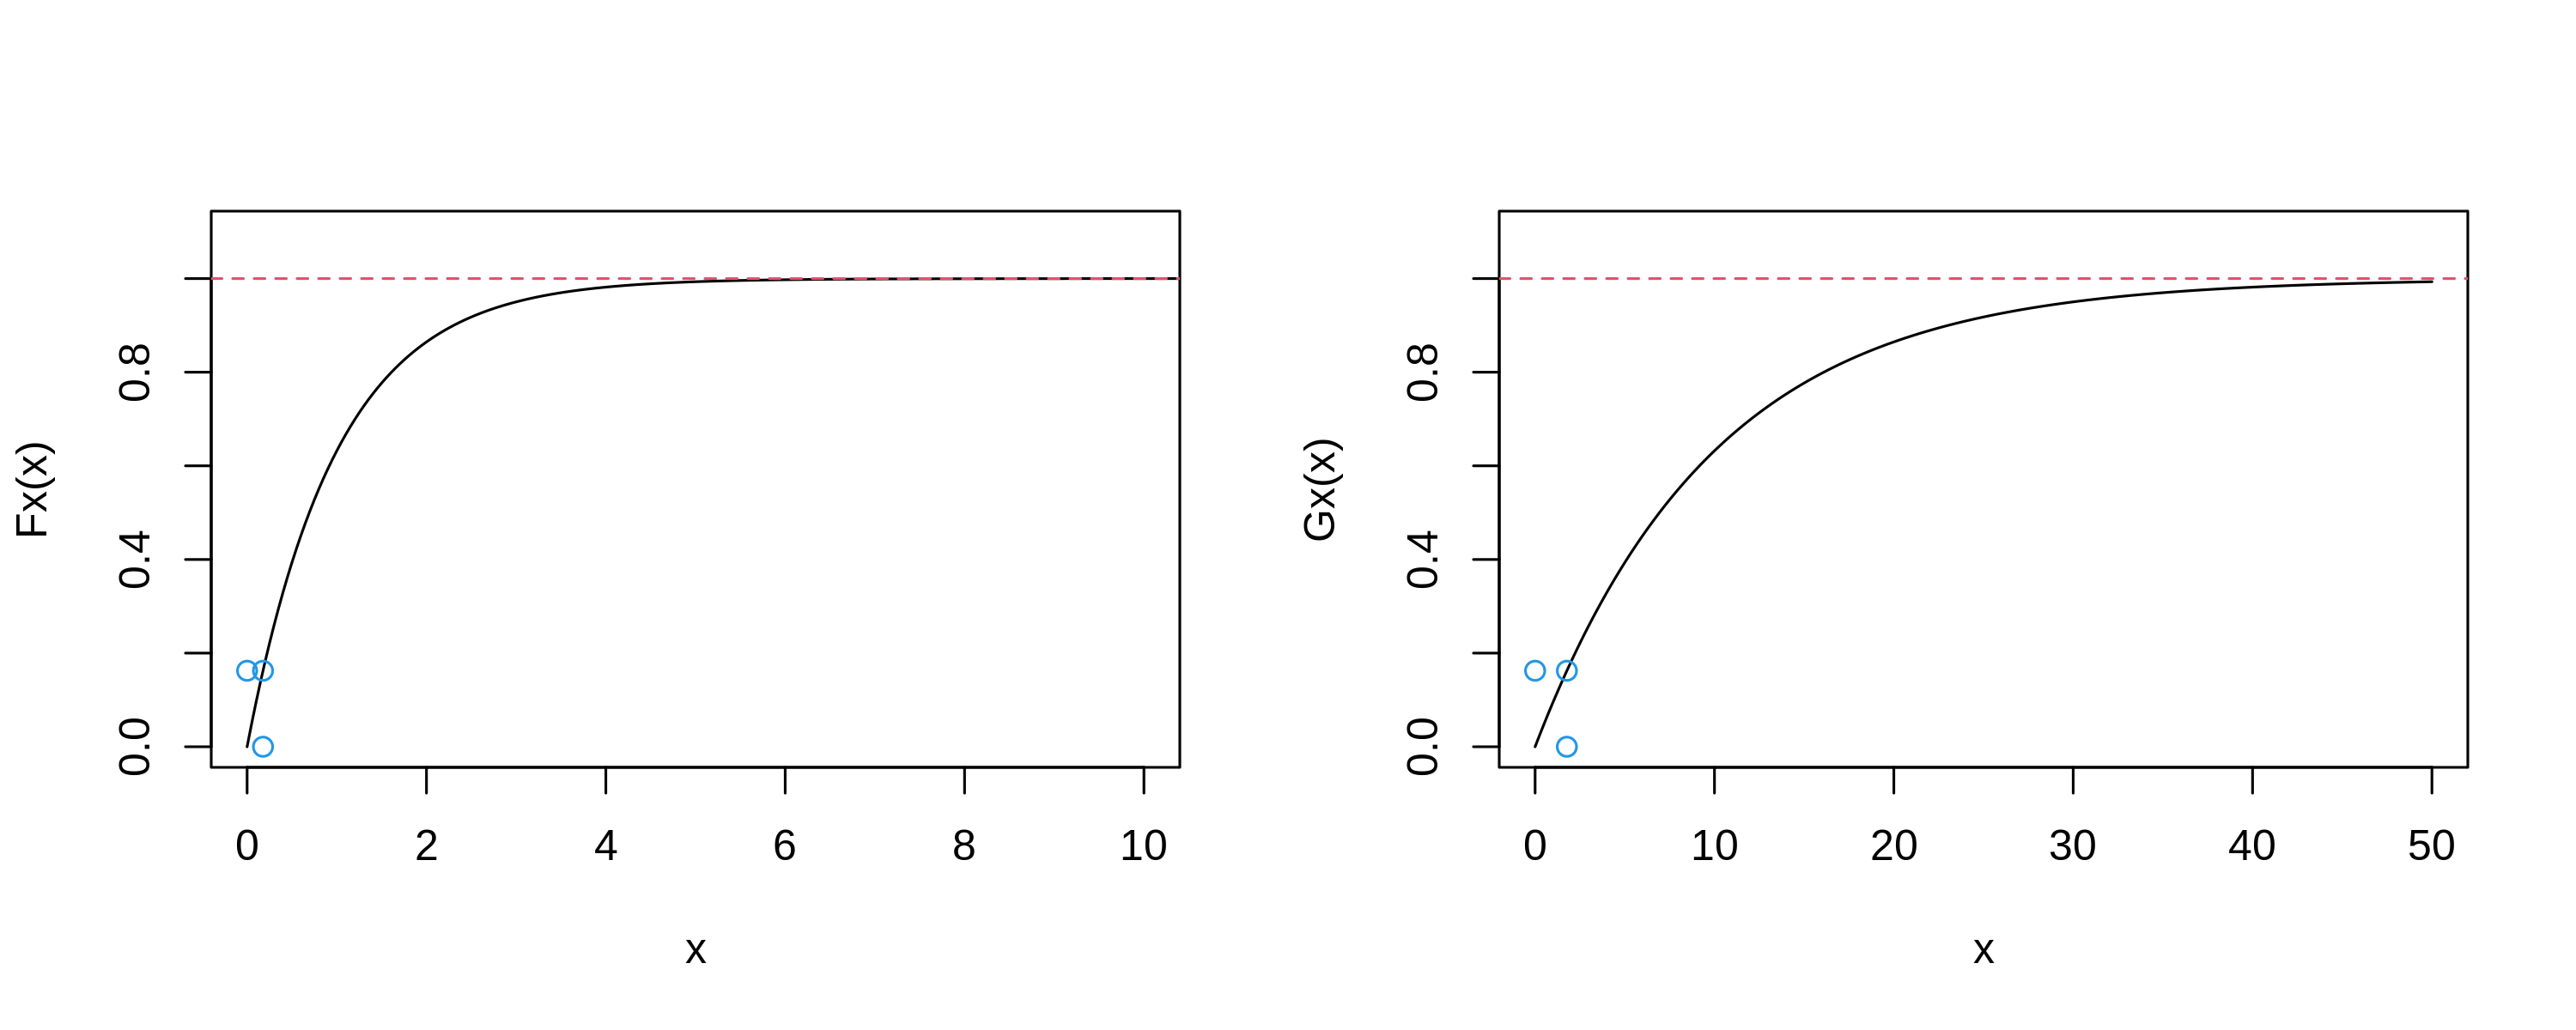

In [132]:
u<-runif(1)
x_left=Finv(u)
x_right=Ginv(u)

options(repr.plot.width=1*10, repr.plot.height=0.8*5,repr.plot.res=1*300)
par(mfrow=c(1,2))
plot(x,Fx(x),ylim=c(0,1.1),type='l',xlim=c(0,10))
abline(h=1,lty=2,col=2)
points(0,u,col=4)
points(x_left,u,col=4)
points(x_left,0,col=4)

plot(x,Gx(x),ylim=c(0,1.1),type='l')
abline(h=1,lty=2,col=2)
points(0,u,col=4)
points(x_right,u,col=4)
points(x_right,0,col=4)
par(mfrow=c(1,1))

왠지 이런식으로 만들면 될 것 같다. 

즉 아래와 같은 알고리즘을 생각하자. 

### *[알고리즘]*

pdf가 $f(x)$이고 서로 독립인 확률변수 $X_1,X_2,\dots, X_n$을 생성하고 싶다면? 

(1) 균등분포에서 $n$개의 난수를 독립적으로 생성한다. 이를 $U_1,\dots,U_n$이라고 하자. 

(2) $X_1=F^{-1}(U_1) ,\dots X_n=F^{-1}(U_n)$ 이라고 둔다.  


**위의 알고리즘이 왜 말이 되는가?** 

(1) 일단 $F(X)=U$라고 가정하자. 
- 수통시간에서 배웠을 것임. 
- 우리의 경우로 치면 `X`를 지수분포에서 생성하고 함수 `exp(-X)`를 취하면 이것은 균등분포를 따른다는 것이다. 

(2) 우리는 $F^{-1}(U)$의 분포가 $X$와 같음을 보이면 된다. 

cdf가 같으면 분포가 같으므로 

임의의 $c$에 대하여 (아무렇게나 $c$를 잡아도)

$Pr(F^{-1}(U)\leq c)=Pr(X\leq c)$

임을 보이면 된다. 

좌변에서 $\leq$의 양쪽에 함수 $F$를 취하여 정리하면 

$Pr(U\leq F(c))$

그런데 $U=F(X)$라고 했으므로 

$Pr(F(X)\leq F(c))$

양쪽에 함수 $F^{-1}$를 취하면 

$Pr(X\leq c)$

따라서 좌변과 우변이 같다. (임의의 $c$에 대하여!)

### 예제1: 역변환기법으로 평균이 1인 지수분포를 1000개 생성

In [133]:
n=10000
U=runif(n)
X=Finv(U)

In [134]:
X2=rexp(n)

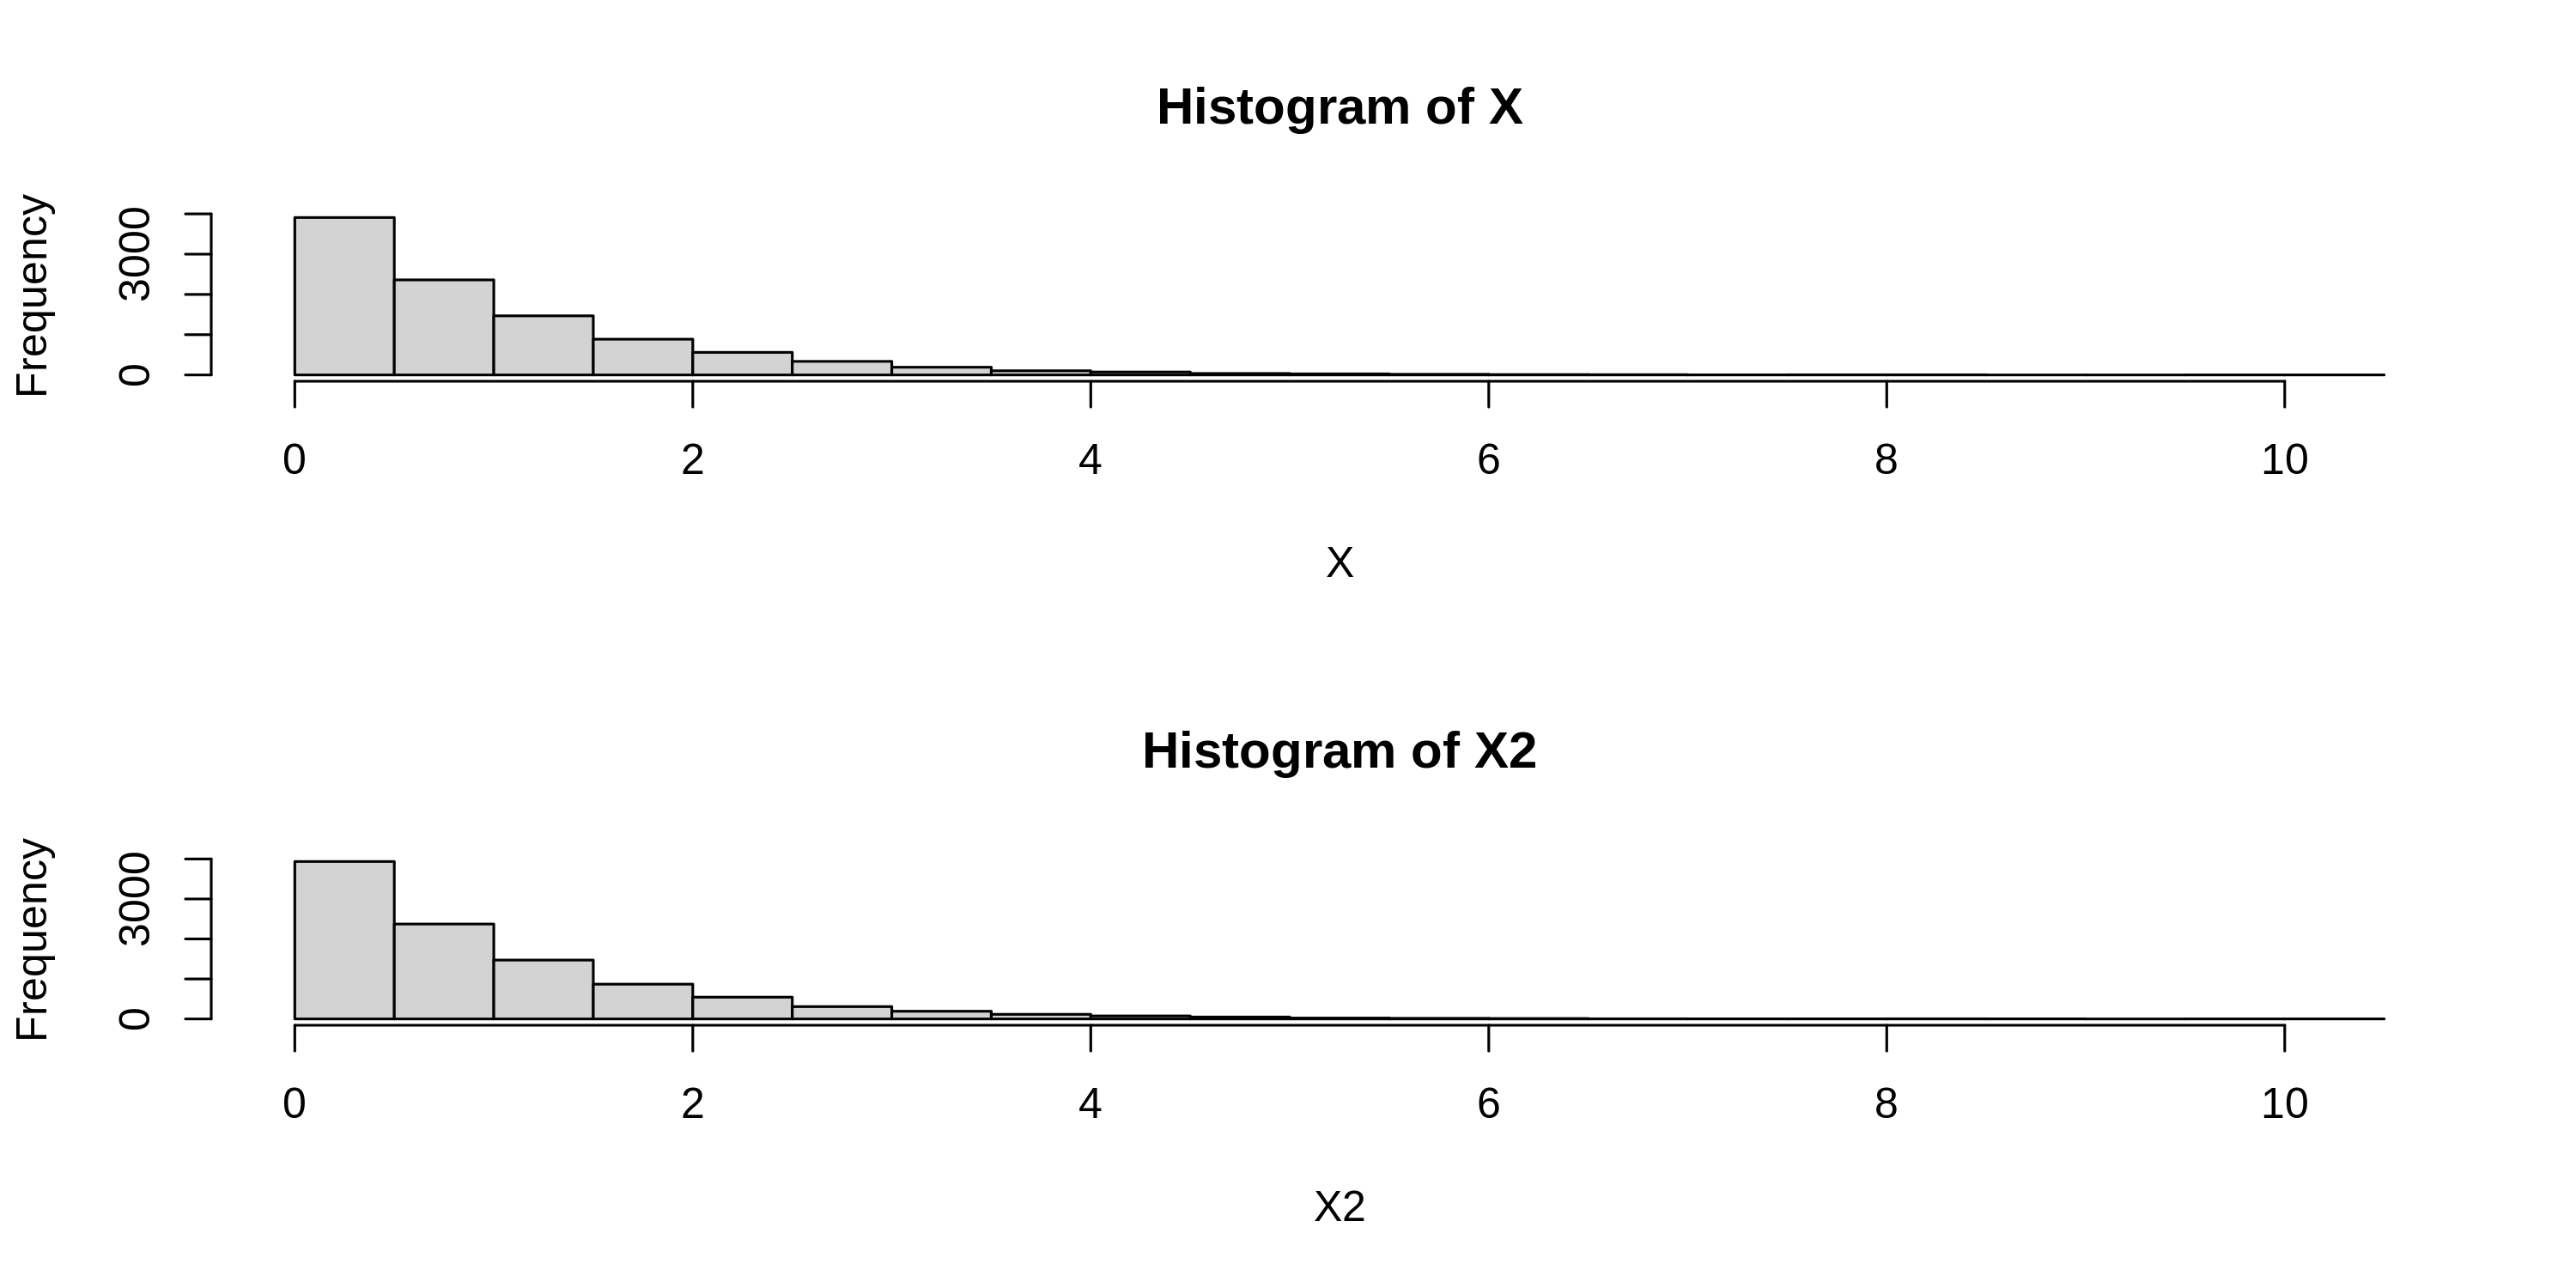

In [138]:
options(repr.plot.width=1*10, repr.plot.height=1*5,repr.plot.res=1*300)
par(mfrow=c(2,1))
hist(X,breaks=30)
hist(X2,breaks=30)
par(mfrow=c(1,1))